##### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Reading data from csv into a pandas dataframe

In [61]:
train_data = pd.read_csv("Road Accident Data.csv")

In [62]:
train_data

Accident_Index Accident Date Day_of_Week              Junction_Control  \
0       200901BS70001      1/1/2021    Thursday      Give way or uncontrolled   
1       200901BS70002      1/5/2021      Monday      Give way or uncontrolled   
2       200901BS70003      1/4/2021      Sunday      Give way or uncontrolled   
3       200901BS70004      1/5/2021      Monday           Auto traffic signal   
4       200901BS70005      1/6/2021     Tuesday           Auto traffic signal   
...               ...           ...         ...                           ...   
307968  201091NM01760     2/18/2022    Thursday  Data missing or out of range   
307969  201091NM01881     2/21/2022      Sunday  Data missing or out of range   
307970  201091NM01935     2/23/2022     Tuesday      Give way or uncontrolled   
307971  201091NM01964     2/23/2022     Tuesday      Give way or uncontrolled   
307972  201091NM02142     2/28/2022      Sunday      Give way or uncontrolled   

                            Junction_Detail Accident_Severity   Latitude  \
0                   T or staggered junction           Serious  51.512273   
1                                Crossroads           Serious  51.514399   
2                   T or staggered junction            Slight  51.486668   
3                   T or staggered junction           Serious  51.507804   
4                                Crossroads           Serious  51.482076   
...                                     ...               ...        ...   
307968  Not at junction or within 20 metres            Slight  57.374005   
307969  Not at junction or within 20 metres            Slight  57.232273   
307970              T or staggered junction            Slight  57.585044   
307971              T or staggered junction           Serious  57.214898   
307972              T or staggered junction           Serious  57.575210   

              Light_Conditions Local_Authority_(District)  \
0                     Daylight     Kensington and Chelsea   
1                     Daylight     Kensington and Chelsea   
2                     Daylight     Kensington and Chelsea   
3                     Daylight     Kensington and Chelsea   
4        Darkness - lights lit     Kensington and Chelsea   
...                        ...                        ...   
307968                Daylight                   Highland   
307969  Darkness - no lighting                   Highland   
307970                Daylight                   Highland   
307971  Darkness - no lighting                   Highland   
307972                Daylight                   Highland   

         Carriageway_Hazards  ...  Number_of_Casualties  Number_of_Vehicles  \
0                        NaN  ...                     1                   2   
1                        NaN  ...                    11                   2   
2                        NaN  ...                     1                   2   
3                        NaN  ...                     1                   2   
4                        NaN  ...                     1                   2   
...                      ...  ...                   ...                 ...   
307968                   NaN  ...                     2                   1   
307969                   NaN  ...                     1                   1   
307970                   NaN  ...                     1                   3   
307971                   NaN  ...                     1                   2   
307972  Other object on road  ...                     1                   1   

               Police_Force Road_Surface_Conditions           Road_Type  \
0       Metropolitan Police                     Dry      One way street   
1       Metropolitan Police             Wet or damp  Single carriageway   
2       Metropolitan Police                     Dry  Single carriageway   
3       Metropolitan Police            Frost or ice  Single carriageway   
4       Metropolitan Police                     Dry  Single carr

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [64]:
train_data.describe()

Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles  \
count  307973.000000  307973.000000         307973.000000       307973.000000   
mean       52.487005      -1.368884              1.356882            1.829063   
std         1.339011       1.356092              0.815857            0.710477   
min        49.914488      -7.516225              1.000000            1.000000   
25%        51.485248      -2.247937              1.000000            1.000000   
50%        52.225943      -1.349258              1.000000            2.000000   
75%        53.415517      -0.206810              1.000000            2.000000   
max        60.598055       1.759398             48.000000           32.000000   

         Speed_limit  
count  307973.000000  
mean       38.866037  
std        14.032933  
min        10.000000  
25%        30.000000  
50%        30.000000  
75%        50.000000  
max        70.000000

#### Missing Data

checking out missing data

In [65]:
missing_data=train_data.isnull().sum()
print(missing_data)

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64


<Axes: >

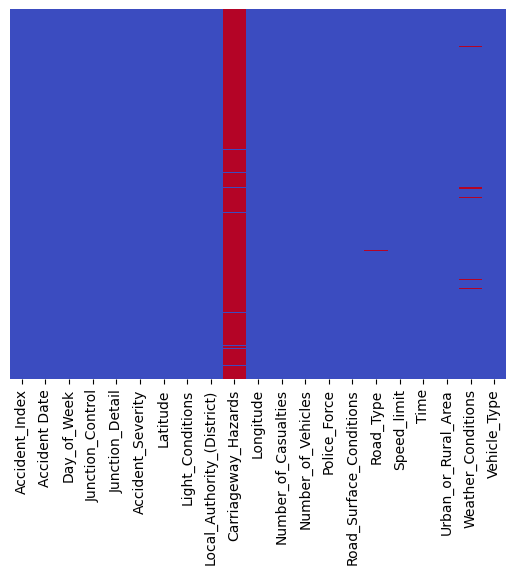

In [9]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Almost Carriageway_Hazards of data is missing.

In [66]:
# Drop Unbalanced columns
train_data.drop(columns='Carriageway_Hazards', inplace=True)
train_data.head()

Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District)  Longitude  \
0               Daylight     Kensington and Chelsea  -0.201349   
1               Daylight     Kensington and Chelsea  -0.199248   
2               Daylight     Kensington and Chelsea  -0.179599   
3               Daylight     Kensington and Chelsea  -0.203110   
4  Darkness - lights lit     Kensington and Chelsea  -0.173445   

   Number_of_Casualties  Number_of_Vehicles         Police_Force  \
0                     1                   2  Metropolitan Police   
1                    11                   2  Metropolitan Police   
2                     1                   2  Metropolitan Police   
3                     1                   2  Metropolitan Police   
4                     1                   2  Metropolitan Police   

  Road_Surface_Conditions           Road_Type  Speed_limit   Time  \
0                     Dry      One way street           30  15:11   
1             Wet or damp  Single carriageway           30  10:59   
2                     Dry  Single carriageway           30  14:19   
3            Frost or ice  Single carriageway           30   8:10   
4                     Dry  Single carriageway           30  17:25   

  Urban_or_Rural_Area  Weather_Conditions           Vehicle_Type  
0               Urban  Fine no high winds                    Car  
1               Urban  Fine no high winds  Taxi/Private hire car  
2               Urban  Fine no high winds  Taxi/Private hire car  
3               Urban               Other  Motorcycle over 500cc  
4               Urban  Fine no high winds                    Car

In [67]:
# Fill missing values with most frequent values
most_freq_surface_conditions = train_data['Road_Surface_Conditions'].mode()[0]
train_data['Road_Surface_Conditions'].fillna(most_freq_surface_conditions, inplace=True)

most_freq_road_type = train_data['Road_Type'].mode()[0]
train_data['Road_Type'].fillna(most_freq_road_type, inplace=True)


In [68]:
# filling missing values in time column
train_data['Time']= train_data['Time'].str.split(':').str[0]
train_data['Time'] = train_data['Time'].astype(float)
mean_time = train_data['Time'].mean().round(0)
train_data['Time'].fillna(mean_time, inplace=True)

In [69]:
#replace vales in Accident_Severity columns
train_data['Accident_Severity'].replace('Fetal', 'Fatal', inplace=True)

In [70]:
# Mapping between Road Surface Conditions and corresponding Weather Conditions ttto fill the missing values
conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

train_data['Weather_Conditions'].fillna(train_data['Road_Surface_Conditions'].map(conditions_mapping), inplace=True)
train_data['Weather_Conditions'].fillna('Other', inplace=True)

In [71]:
# Rename Columns name
train_data = train_data.rename(columns={'Accident_Severity': 'Accident_Injuries', 'Number_of_Casualties': 'death_toll' , 'Accident_Index': 'Accident_ID' , 'Time':'Hour_of_Accident'})
# order of week days
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [72]:
train_data.columns

Index(['Accident_ID', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Injuries', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'death_toll',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Hour_of_Accident', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [73]:
# Creating a Pivot Table to analyze number of death values based on 'Weather Conditions' and 'Speed limit'
pivot_table = pd.pivot_table(train_data, values='death_toll', index=['Urban_or_Rural_Area','Road_Type'], columns='Hour_of_Accident', fill_value=None).round(0)
pivot_table

Hour_of_Accident                        0.0   1.0   2.0   3.0   4.0   5.0   \
Urban_or_Rural_Area Road_Type                                                
Rural               Dual carriageway     2.0   1.0   2.0   1.0   1.0   1.0   
                    One way street       1.0   1.0   1.0   1.0   1.0   1.0   
                    Roundabout           1.0   1.0   1.0   2.0   1.0   1.0   
                    Single carriageway   1.0   2.0   1.0   2.0   1.0   1.0   
                    Slip road            2.0   2.0   1.0   1.0   1.0   1.0   
Urban               Dual carriageway     2.0   2.0   1.0   1.0   1.0   1.0   
                    One way street       1.0   1.0   1.0   1.0   1.0   1.0   
                    Roundabout           2.0   1.0   1.0   1.0   2.0   1.0   
                    Single carriageway   1.0   1.0   1.0   1.0   1.0   1.0   
                    Slip road            1.0   1.0   1.0   2.0   2.0   1.0   

Hour_of_Accident                        6.0   7.0   8.0   9.0   ...  14.0  \
Urban_or_Rural_Area Road_Type                                   ...         
Rural               Dual carriageway     1.0   1.0   1.0   1.0  ...   2.0   
                    One way street       1.0   1.0   1.0   1.0  ...   1.0   
                    Roundabout           1.0   1.0   1.0   1.0  ...   1.0   
                    Single carriageway   1.0   1.0   1.0   1.0  ...   2.0   
                    Slip road            1.0   1.0   1.0   1.0  ...   2.0   
Urban               Dual carriageway     1.0   1.0   1.0   1.0  ...   1.0   
                    One way street       1.0   1.0   1.0   1.0  ...   1.0   
                    Roundabout           1.0   1.0   1.0   1.0  ...   1.0   
                    Single carriageway   1.0   1.0   1.0   1.0  ...   1.0   
                    Slip road            1.0   1.0   1.0   1.0  ...   2.0   

Hour_of_Accident                        15.0  16.0  17.0  18.0  19.0  20.0  \
Urban_or_Rural_Area Road_Type                                                
Rural               Dual carriageway     2.0   2.0   2.0   2.0   2.0   2.0   
                    One way street       1.0   1.0   1.0   1.0   1.0   2.0   
                    Roundabout           1.0   1.0   1.0   1.0   1.0   1.0   
                    Single carriageway   2.0   2.0   1.0   1.0   2.0   2.0   
                    Slip road            2.0   2.0   2.0   2.0   2.0   1.0   
Urban               Dual carriageway     1.0   1.0   1.0   1.0   1.0   1.0   
                    One way street       1.0   1.0   1.0   1.0   1.0   1.0   
                    Roundabout           1.0   1.0   1.0   1.0   1.0   1.0   
                    Single carriageway   1.0   1.0   1.0   1.0   1.0   1.0   
                    Slip road            1.0   1.0   1.0   1.0   1.0   2.0   

Hour_of_Accident                        21.0  22.0  23.0  
Urban_or_Rural_Area Road_Type                             
Rural               Dual carriageway     2.0   2.0   2.0  
                    One way street       1.0   2.0   1.0  
                    Roundabout           1.0   1.0   1.0  
                    Single carriageway   2.0   2.0   2.0  
                    Slip road            1.0   2.0   2.0  
Urban               Dual carriageway     2.0   2.0   1.0  
                    One way street       1.0   1.0   1.0  
                    Roundabout           1.0   1.0   1.0  
                    Single carriageway   1.0   1.0   1.0  
                    Slip road            1.0   2.0   2.0  

[10 rows x 24 columns]

In [74]:
# Creating a Pivot Table to analyze number of death values based on 'Road Type' and 'Speed limit'
pivot_table = pd.pivot_table(train_data, values='death_toll', index=['Urban_or_Rural_Area','Road_Surface_Conditions'], columns='Hour_of_Accident', fill_value=None).round(0)
pivot_table

Hour_of_Accident                             0.0   1.0   2.0   3.0   4.0   \
Urban_or_Rural_Area Road_Surface_Conditions                                 
Rural               Dry                       2.0   2.0   1.0   1.0   1.0   
                    Flood over 3cm. deep      1.0   1.0   1.0   3.0   1.0   
                    Frost or ice              1.0   1.0   1.0   2.0   1.0   
                    Snow                      1.0   2.0   1.0   1.0   1.0   
                    Wet or damp               2.0   1.0   2.0   2.0   1.0   
Urban               Dry                       1.0   1.0   1.0   1.0   1.0   
                    Flood over 3cm. deep      2.0   3.0   1.0   1.0   1.0   
                    Frost or ice              1.0   1.0   1.0   1.0   1.0   
                    Snow                      1.0   1.0   1.0   1.0   1.0   
                    Wet or damp               1.0   1.0   2.0   1.0   1.0   

Hour_of_Accident                             5.0   6.0   7.0   8.0   9.0   \
Urban_or_Rural_Area Road_Surface_Conditions                                 
Rural               Dry                       1.0   1.0   1.0   1.0   1.0   
                    Flood over 3cm. deep      1.0   1.0   1.0   1.0   1.0   
                    Frost or ice              1.0   1.0   1.0   1.0   1.0   
                    Snow                      1.0   1.0   1.0   1.0   1.0   
                    Wet or damp               1.0   1.0   1.0   1.0   1.0   
Urban               Dry                       1.0   1.0   1.0   1.0   1.0   
                    Flood over 3cm. deep      2.0   1.0   1.0   1.0   1.0   
                    Frost or ice              1.0   1.0   1.0   1.0   1.0   
                    Snow                      1.0   1.0   1.0   1.0   1.0   
                    Wet or damp               1.0   1.0   1.0   1.0   1.0   

Hour_of_Accident                             ...  14.0  15.0  16.0  17.0  \
Urban_or_Rural_Area Road_Surface_Conditions  ...                           
Rural               Dry                      ...   2.0   2.0   2.0   1.0   
                    Flood over 3cm. deep     ...   1.0   2.0   1.0   1.0   
                    Frost or ice             ...   1.0   1.0   1.0   1.0   
                    Snow                     ...   2.0   2.0   2.0   1.0   
                    Wet or damp              ...   2.0   2.0   2.0   2.0   
Urban               Dry                      ...   1.0   1.0   1.0   1.0   
                    Flood over 3cm. deep     ...   1.0   1.0   1.0   1.0   
                    Frost or ice             ...   1.0   1.0   1.0   1.0   
                    Snow                     ...   1.0   1.0   1.0   1.0   
                    Wet or damp              ...   1.0   1.0   1.0   1.0   

Hour_of_Accident                             18.0  19.0  20.0  21.0  22.0  \
Urban_or_Rural_Area Road_Surface_Conditions                                 
Rural               Dry                       1.0   2.0   1.0   2.0   2.0   
                    Flood over 3cm. deep      1.0   2.0   2.0   1.0   2.0   
                    Frost or ice              1.0   1.0   1.0   2.0   2.0   
                    Snow                      1.0   2.0   2.0   2.0   1.0   
                    Wet or damp               2.0   2.0   2.0   2.0   2.0   
Urban               Dry                       1.0   1.0   1.0   1.0   1.0   
                    Flood over 3cm. deep      2.0   2.0   1.0   2.0   3.0   
                    Frost or ice              1.0   1.0   1.0   1.0   1.0   
                    Snow                      1.0   1.0   1.0   1.0   1.0   
                    Wet or damp               1.0   1.0   1.0   1.0   1.0   

Hour_of_Accident                             23.0  
Urban_or_Rural_Area Road_Surface_Conditions        
Rural               Dry                       2.0  
                    Flood over 3cm. deep      2.0  
                    Frost or ice              1.0  
                    Snow                      2.0  


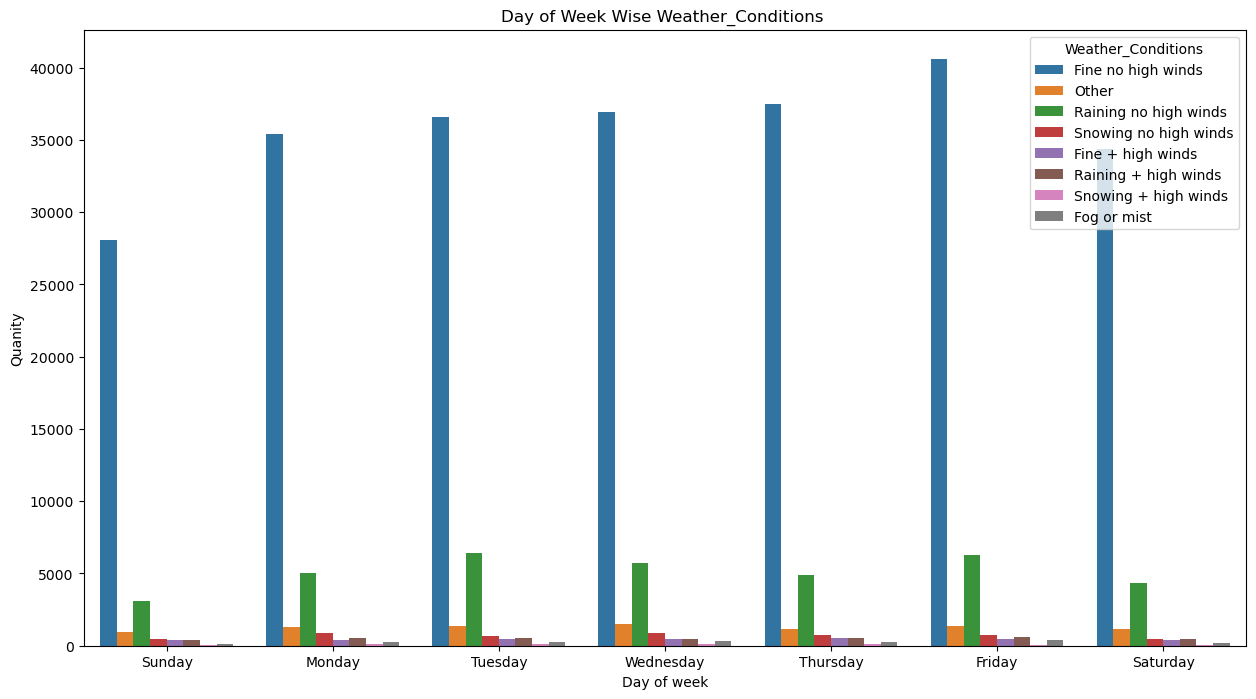

In [75]:
# Count of weather conditions in day of week
plt.figure(figsize=(15, 8))
ax = sns.countplot(data = train_data, x ='Day_of_Week',hue='Weather_Conditions',order=day_order)
plt.title('Day of Week Wise Weather_Conditions ')
plt.xlabel('Day of week')
plt.ylabel('Quanity')
plt.show()

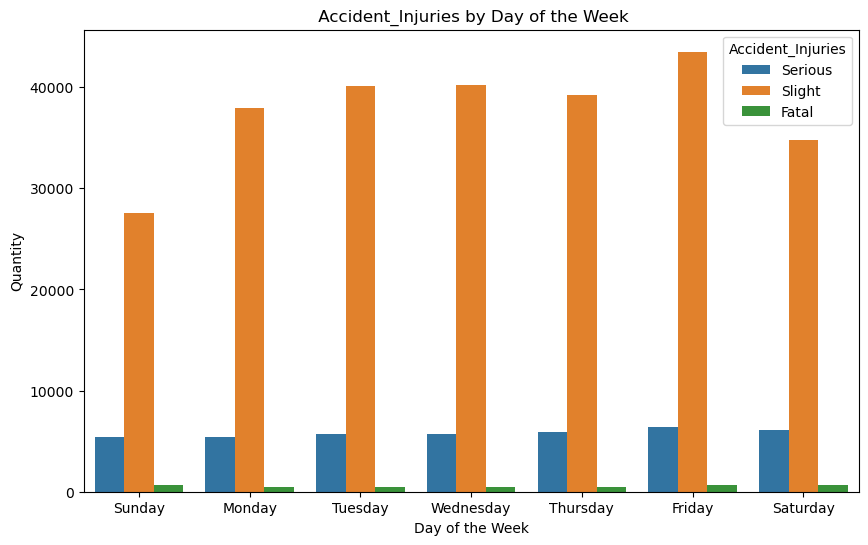

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(data = train_data, x = 'Day_of_Week', hue = 'Accident_Injuries',order=day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Quantity')
plt.title(' Accident_Injuries by Day of the Week')
plt.show()

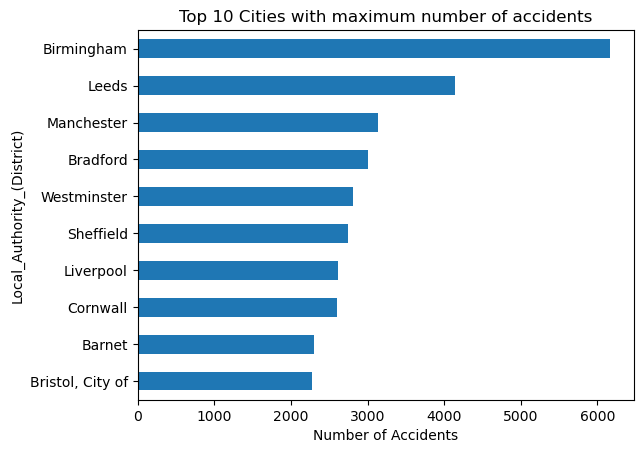

In [77]:
train_data['Local_Authority_(District)'].value_counts()[:10].sort_values().plot(kind='barh')
plt.xlabel('Number of Accidents')
plt.title('Top 10 Cities with maximum number of accidents')
plt.show()

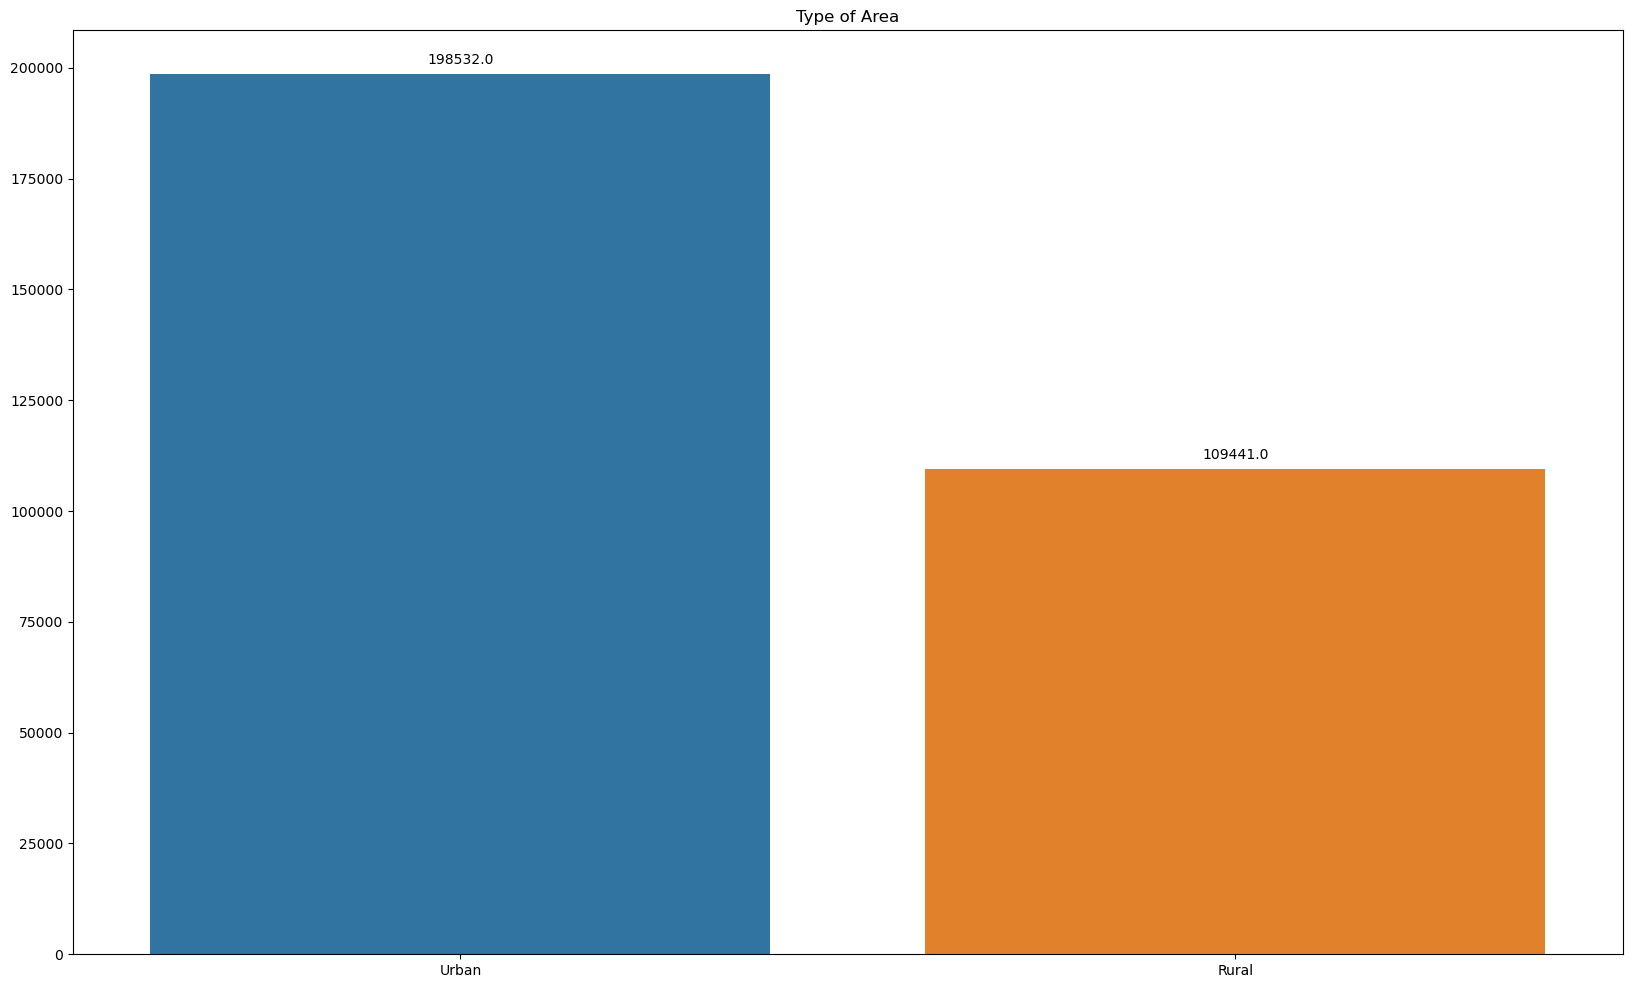

In [78]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = train_data, x = 'Urban_or_Rural_Area')
# Add quantity labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Type of Area')
plt.xlabel('')
plt.ylabel('')
plt.show()

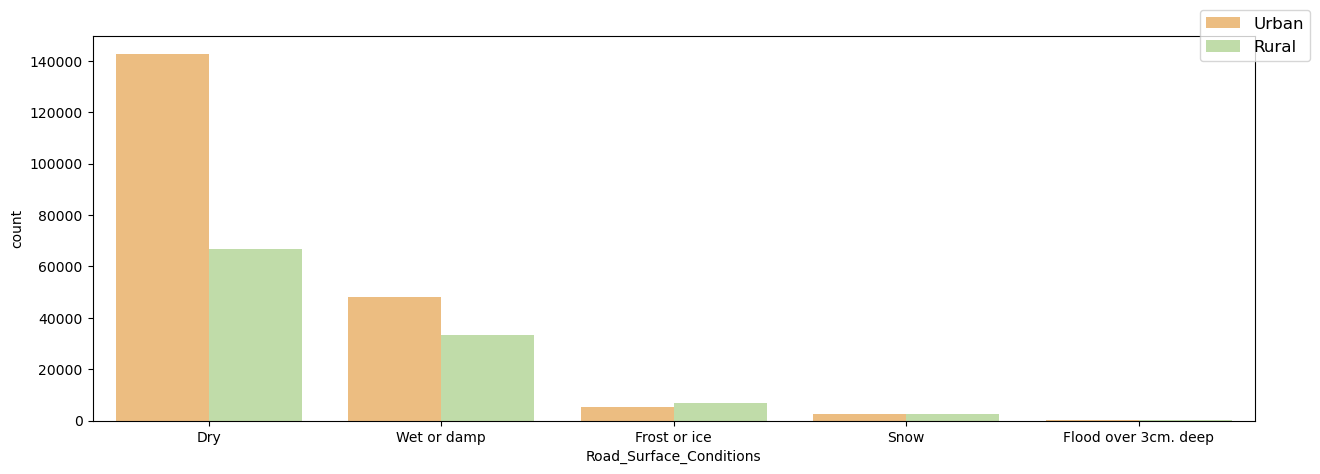

In [79]:
# distribution of accidents based on road surface conditions in area wise
plt.figure(figsize=(15, 5))
sns.countplot(data=train_data, x='Road_Surface_Conditions', palette="Spectral", hue='Urban_or_Rural_Area')
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='large')

Text(0, 0.5, ' ')

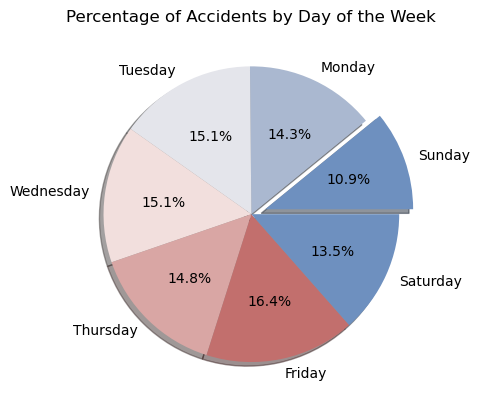

In [80]:
# Percentage of Accidents by Day of the Week
train_data['Day_of_Week'].value_counts().loc[day_order].plot(kind='pie', autopct='%0.1f%%', explode=[0.1,0,0,0,0,0,0], shadow=True, colors=sns.color_palette("vlag"))
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')

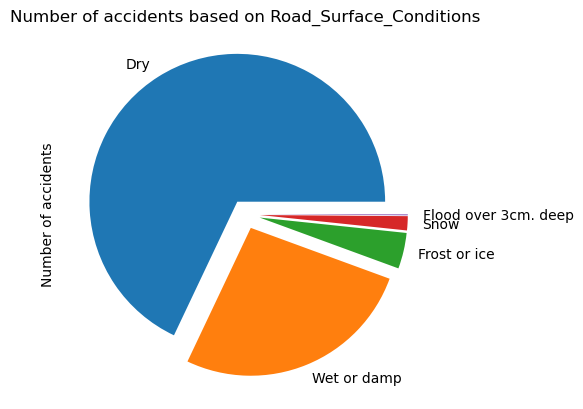

In [81]:
# Number of accidents based on Road_Surface_Conditions
train_data.Road_Surface_Conditions.value_counts().plot(kind='pie',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Number of accidents based on Road_Surface_Conditions')
plt.ylabel('Number of accidents')
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Darkness - lighting unknown'),
  Text(1, 0, 'Darkness - lights lit'),
  Text(2, 0, 'Darkness - lights unlit'),
  Text(3, 0, 'Darkness - no lighting'),
  Text(4, 0, 'Daylight')])

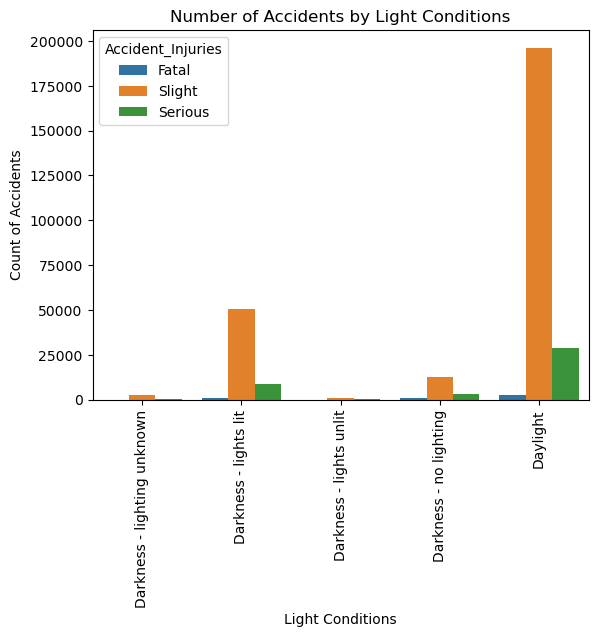

In [86]:
# Count of accident by Light Conditions
train_data_sorted = train_data.sort_values(by='Light_Conditions')
sns.countplot(data=train_data_sorted, x='Light_Conditions',hue='Accident_Injuries')
plt.title('Number of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count of Accidents')
plt.xticks(rotation =90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'T or staggered junction'),
  Text(1, 0, 'Crossroads'),
  Text(2, 0, 'Not at junction or within 20 metres'),
  Text(3, 0, 'Roundabout'),
  Text(4, 0, 'Mini-roundabout'),
  Text(5, 0, 'More than 4 arms (not roundabout)'),
  Text(6, 0, 'Private drive or entrance'),
  Text(7, 0, 'Slip road'),
  Text(8, 0, 'Other junction')])

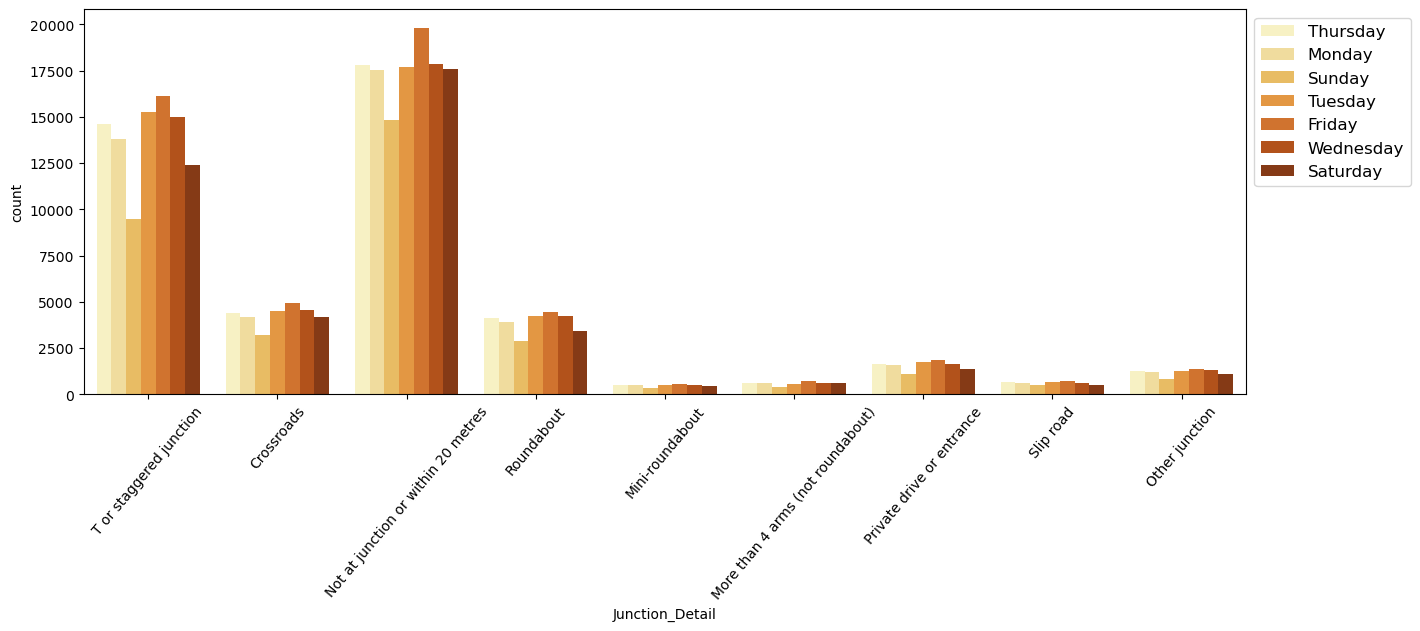

In [83]:
# Count of accident by junction details for each day in the week
plt.figure(figsize=(15,5))
sns.countplot(data=train_data, x= 'Junction_Detail' ,palette="YlOrBr", hue='Day_of_Week')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='large')
plt.xticks(rotation = 50)

<Axes: >

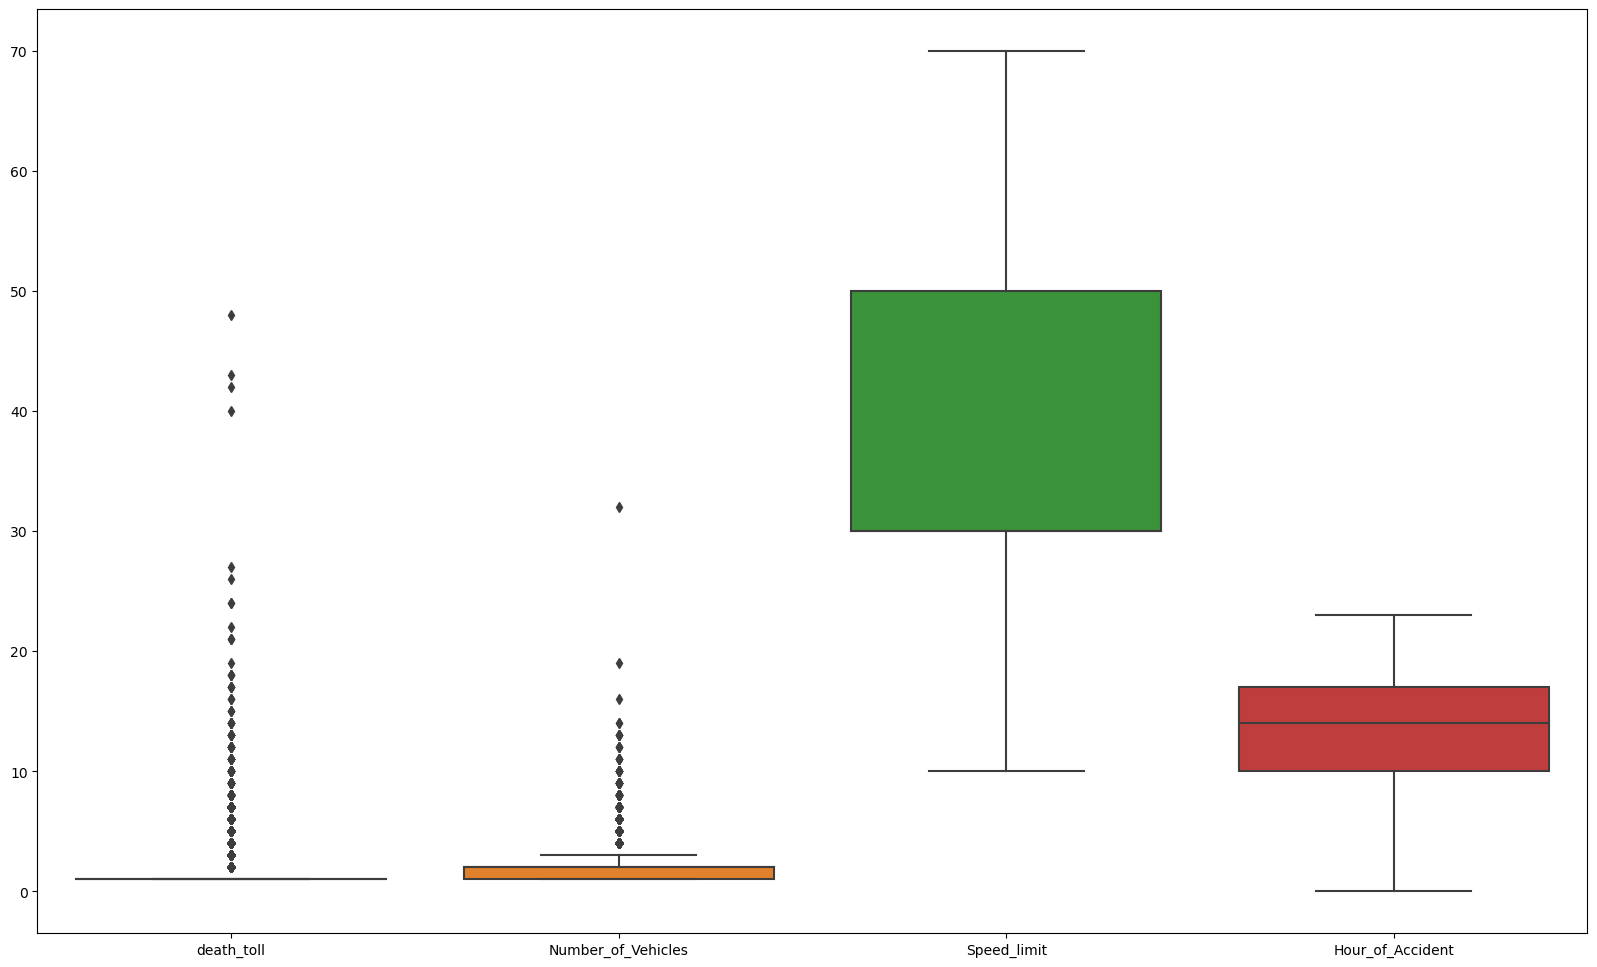

In [84]:
plt.figure(figsize=(20,12))
data_n = ['death_toll','Number_of_Vehicles','Speed_limit','Hour_of_Accident']
sns.boxplot(data = train_data[data_n])

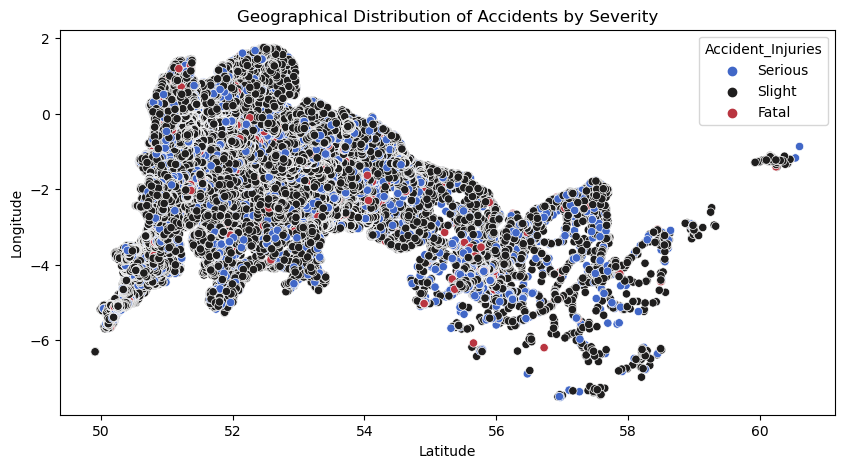

In [95]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Latitude', y='Longitude', hue='Accident_Injuries', data=train_data, palette='icefire', alpha=1.0)
plt.title('Geographical Distribution of Accidents by Severity')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()